In [1]:
# PROJECT: CV Project 2 - Face Recognition  

In [2]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [3]:
# Import libraries 
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import os
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)
import cv2
import math
import time
from glob import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, MaxPool2D, GlobalMaxPooling2D, Input, Concatenate
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model 
from keras import optimizers
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.utils.np_utils import to_categorical 
from keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve, GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,CSVLogger
from keras.layers import Convolution2D 
from keras.utils import np_utils
from keras import layers
from keras import regularizers
from keras.models import Model
from keras.models import Sequential, load_model
from sklearn import preprocessing
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger
import skimage.io as io
from sklearn.metrics import classification_report, confusion_matrix
import glob
import pickle
# GLOBAL VARIABLES
scale = 71
seed = 7

2.8.2


In [5]:
# Part A
# DOMAIN: Entertainment
# PROJECT OBJECTIVE: To build a face detection system.

In [6]:
# 1. Import and Understand the data

In [7]:
# Q1 A
# Import and read ‘images.npy’.

In [8]:
# Solution 
base_path = '/content/drive/My Drive/'
data = np.load(base_path + "Data/images.npy",  allow_pickle = True)

In [9]:
data.shape

(409, 2)

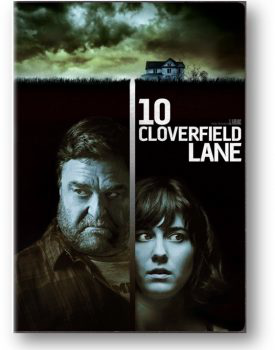

In [10]:
from google.colab.patches import cv2_imshow 
cv2_imshow(data[23][0])

In [11]:
# Q1 B
# Split the data into Features(X) & labels(Y). Unify shape of all the images.

In [12]:
# Solution.
images = data[:,0]
X = images 
mask = data[:,1]
Y = mask
print(images.shape, mask.shape)

(409,) (409,)


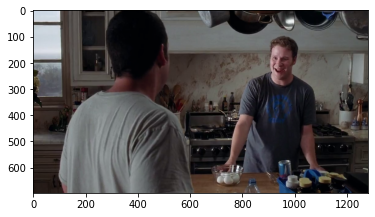

In [13]:
# Checking a few images 
plt.imshow(X[1])

In [14]:
X[1].shape

(697, 1280, 4)

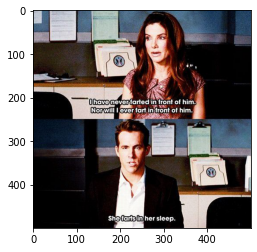

In [15]:
plt.imshow(X[5])

In [16]:
X[5].shape

(500, 500, 3)

In [17]:
# Checking the coordinates of masks of the above images  
Y[1]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.7053087757313109, 'y': 0.23260437375745527},
   {'x': 0.7692307692307693, 'y': 0.36182902584493043}],
  'imageWidth': 1280,
  'imageHeight': 697}]

In [18]:
Y[5]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.486, 'y': 0.046}, {'x': 0.678, 'y': 0.272}],
  'imageWidth': 500,
  'imageHeight': 500},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.374, 'y': 0.524}, {'x': 0.542, 'y': 0.794}],
  'imageWidth': 500,
  'imageHeight': 500}]

In [19]:
# Unifying shape of images 
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
ALPHA = 1

In [20]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
# Masked image 
Y = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        Y[index][y1:y2, x1:x2] = 1

In [21]:
X.shape, Y.shape

((409, 224, 224, 3), (409, 224, 224))

In [22]:
# Q1 C
# Split the data into train and test [400:9]

In [23]:
# Solution
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.0201, random_state=7)

In [24]:
trainX.shape, trainY.shape, testX.shape, testY.shape

((400, 224, 224, 3), (400, 224, 224), (9, 224, 224, 3), (9, 224, 224))

In [25]:
# Q1 D
# Select random image from the train data and display original image and masked image.

[[[ 0.78039217  0.67843139  0.54509807]
  [ 0.77254903  0.67058825  0.53725493]
  [ 0.77254903  0.67058825  0.53725493]
  ...
  [ 0.59215689  0.41176474  0.1686275 ]
  [ 0.59215689  0.41176474  0.1686275 ]
  [ 0.58431375  0.4039216   0.16078436]]

 [[ 0.78039217  0.67843139  0.54509807]
  [ 0.77254903  0.67058825  0.53725493]
  [ 0.77254903  0.67058825  0.54509807]
  ...
  [ 0.59215689  0.41176474  0.1686275 ]
  [ 0.59215689  0.41176474  0.1686275 ]
  [ 0.58431375  0.4039216   0.16078436]]

 [[ 0.78039217  0.67843139  0.54509807]
  [ 0.78039217  0.67843139  0.5529412 ]
  [ 0.78039217  0.67843139  0.5529412 ]
  ...
  [ 0.59215689  0.41176474  0.1686275 ]
  [ 0.59215689  0.41176474  0.1686275 ]
  [ 0.59215689  0.41176474  0.1686275 ]]

 ...

 [[ 0.75686276  0.62352943  0.4666667 ]
  [ 0.75686276  0.62352943  0.4666667 ]
  [ 0.75686276  0.62352943  0.4666667 ]
  ...
  [ 0.1686275  -0.35686272 -0.77254903]
  [ 0.16078436 -0.36470586 -0.78039217]
  [ 0.09803927 -0.44313723 -0.8509804 ]]

 [

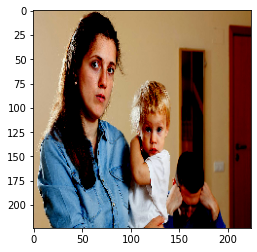

In [26]:
# Solution
from matplotlib import pyplot
# Original image 
n = 5
print(trainX[n])
pyplot.imshow(trainX[n])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


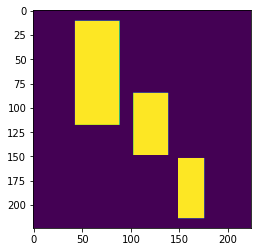

In [27]:
# Masked image
n = 5
print(trainY[n])
pyplot.imshow(trainY[n])

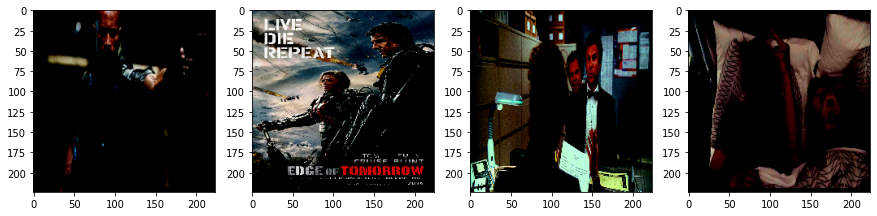

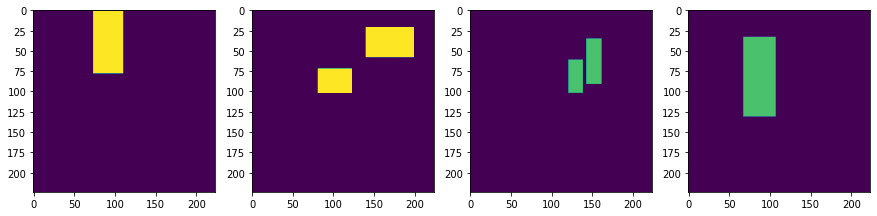

In [28]:
# Visualising a few more images with their masks 
fig = plt.figure(figsize=(15, 15))
a = fig.add_subplot(1, 4, 1)
imgplot = plt.imshow(trainX[0])

a = fig.add_subplot(1, 4, 2)
imgplot = plt.imshow(trainX[10])
imgplot.set_clim(0.0, 0.7)

a = fig.add_subplot(1, 4, 3)
imgplot = plt.imshow(trainX[25])
imgplot.set_clim(0.0, 1.4)

a = fig.add_subplot(1, 4, 4)
imgplot = plt.imshow(trainX[30])
imgplot.set_clim(0.0, 2.1)

fig = plt.figure(figsize=(15, 15))
a = fig.add_subplot(1, 4, 1)
imgplot = plt.imshow(trainY[0])

a = fig.add_subplot(1, 4, 2)
imgplot = plt.imshow(trainY[10])
imgplot.set_clim(0.0, 0.7)

a = fig.add_subplot(1, 4, 3)
imgplot = plt.imshow(trainY[25])
imgplot.set_clim(0.0, 1.4)

a = fig.add_subplot(1, 4, 4)
imgplot = plt.imshow(trainY[30])
imgplot.set_clim(0.0, 1.4)

In [29]:
# 2. Model building   

In [30]:
# Q2 A
# Design a face mask detection model. 

In [31]:
# Architecture
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model
import tensorflow as tf

HEIGHT_CELLS = 28
WIDTH_CELLS = 28
BATCH_SIZE = 1

In [32]:
model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA, weights="imagenet")
model.summary()  

17235968/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

In [33]:
def create_model(trainable=False):
    seed = 7
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA, weights="imagenet")
    for layer in model.layers:
        layer.trainable = trainable

    block00 = model.layers[0].input
    block01 = model.get_layer("conv_pw_1_relu").output
    block02 = model.get_layer("conv_pw_2_relu").output
    block03 = model.get_layer("conv_pw_3_relu").output
    block05 = model.get_layer("conv_pw_5_relu").output
    block11 = model.get_layer("conv_pw_11_relu").output
    block13 = model.get_layer("conv_pw_13_relu").output

    decoderBlock = Concatenate()([UpSampling2D()(block13), block11])
    decoderBlock = Concatenate()([UpSampling2D()(decoderBlock), block05])
    decoderBlock = Concatenate()([UpSampling2D()(decoderBlock), block03])
    decoderBlock = Concatenate()([UpSampling2D()(decoderBlock), block01])
    decoderBlock = Concatenate()([UpSampling2D()(decoderBlock), block00])

    decoderBlock = Conv2D(1, kernel_size=1, activation="sigmoid")(decoderBlock)
    decoderBlock = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(decoderBlock)

    return Model(inputs=model.input, outputs=decoderBlock) 

In [34]:
model = create_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 112, 112, 32  128         ['conv1[0][0]']                  
                                )                                                             

In [35]:
# The architecture above replicates an U-net architecture 

In [36]:
# Q2 B
# Design your own Dice Coefficient and Loss function.

In [37]:
# Solution
# Dice coefficient
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return numerator / (denominator + tf.keras.backend.epsilon())

In [38]:
# Loss function 
from tensorflow.keras.losses import binary_crossentropy 
from tensorflow.keras.from tensorflow.keras.backend import log, epsilon 
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon()) import log, epsilon 
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

In [39]:
# Q2 C
# Train and tune the model as required

In [40]:
# Solution
model = create_model(False)
model.summary()
optimizer = tf.keras.optimizers.Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer = optimizer, metrics=[dice_coefficient])

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 112, 112, 32  128         ['conv1[0][0]']                  
                                )                                                           

In [41]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", save_freq=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=1, min_lr=1e-6, verbose=1, mode="min")

In [42]:
# Fitting the model
model.fit(trainX, trainY, epochs = 15, verbose=1, batch_size=3, callbacks=[checkpoint,reduce_lr,stop])

Epoch 1/15

Epoch 1: loss improved from inf to 2.16301, saving model to model-2.16.h5
  1/134 [..............................] - ETA: 29:05 - loss: 2.1630 - dice_coefficient: 0.2762
Epoch 1: loss improved from 2.16301 to 2.09723, saving model to model-2.10.h5
  2/134 [..............................] - ETA: 25s - loss: 2.0972 - dice_coefficient: 0.2658  
Epoch 1: loss did not improve from 2.09723
  3/134 [..............................] - ETA: 17s - loss: 2.1218 - dice_coefficient: 0.2502
Epoch 1: loss did not improve from 2.09723
  4/134 [..............................] - ETA: 14s - loss: 2.2190 - dice_coefficient: 0.2326
Epoch 1: loss did not improve from 2.09723
  5/134 [>.............................] - ETA: 12s - loss: 2.4068 - dice_coefficient: 0.2057
Epoch 1: loss did not improve from 2.09723
  6/134 [>.............................] - ETA: 11s - loss: 2.4292 - dice_coefficient: 0.1946
Epoch 1: loss did not improve from 2.09723
  7/134 [>.............................] - ETA: 11s -

In [43]:
# Model evaluation on test data
model.evaluate(testX, testY)

1/1 [==============================] - 1s 887ms/step - loss: 0.6290 - dice_coefficient: 0.6331


[0.6290428638458252, 0.6330701112747192]

In [44]:
# Model tuning
# Lets use a learning rate decay process/schedule to modulate how the learning rate of Adam optimizer changes over time:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

In [45]:
model.summary()
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.999)
model.compile(loss=loss, optimizer = optimizer, metrics=[dice_coefficient])

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 112, 112, 32  128         ['conv1[0][0]']                  
                                )                                                           

In [46]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", save_freq=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")

In [47]:
# Fitting the model
model.fit(trainX, trainY, epochs = 15, verbose=1, batch_size=3, callbacks=[checkpoint,stop])

Epoch 1/15

Epoch 1: loss improved from inf to 0.72996, saving model to model-0.73.h5
  1/134 [..............................] - ETA: 4:22 - loss: 0.7300 - dice_coefficient: 0.6284
Epoch 1: loss did not improve from 0.72996
  2/134 [..............................] - ETA: 8s - loss: 4.1654 - dice_coefficient: 0.3158  
Epoch 1: loss did not improve from 0.72996
  3/134 [..............................] - ETA: 8s - loss: 3.3696 - dice_coefficient: 0.3028
Epoch 1: loss did not improve from 0.72996
  4/134 [..............................] - ETA: 8s - loss: 3.1214 - dice_coefficient: 0.3162
Epoch 1: loss did not improve from 0.72996
  5/134 [>.............................] - ETA: 8s - loss: 3.2390 - dice_coefficient: 0.3098
Epoch 1: loss did not improve from 0.72996
  6/134 [>.............................] - ETA: 8s - loss: 3.0549 - dice_coefficient: 0.3312
Epoch 1: loss did not improve from 0.72996
  7/134 [>.............................] - ETA: 8s - loss: 2.9145 - dice_coefficient: 0.3460
E

In [48]:
# Model evaluation on test data
model.evaluate(testX, testY)

1/1 [==============================] - 1s 622ms/step - loss: 0.7145 - dice_coefficient: 0.6912


[0.7145036458969116, 0.6912271976470947]

In [49]:
# Q2. D
# Evaluate and share insights on performance of the model

In [50]:
# Solution
# Dice coefficient improved by approximately 6% post model tuning. 
# Dice Coefficient is 2 * the Area of Overlap divided by the total number of pixels in both images. 
# The similarity between true Y and predicted Y increased though marginally, post model tuning (Y is the mask of the image X)  

In [51]:
# Q3. 
# Test the model predictions on the test image: ‘image with index 3 in the test data’ and visualise the predicted masks on the faces in the image.

In [52]:
# Test image 
n = 3 
unscaled = testX[n]
image = cv2.resize(unscaled, (IMAGE_WIDTH, IMAGE_HEIGHT))

In [53]:
image

array([[[ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        ...,
        [-0.23921567, -0.30196077, -0.46666664],
        [-0.26274508, -0.3098039 , -0.48235291],
        [-0.27843136, -0.31764704, -0.49019605]],

       [[ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        ...,
        [-0.2235294 , -0.28627449, -0.45098037],
        [-0.24705881, -0.29411763, -0.46666664],
        [-0.26274508, -0.30196077, -0.47450978]],

       [[ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        ...,
        [-0.21568626, -0.27843136, -0.45098037],
        [-0.21568626, -0.26274508, -0.44313723],
        [-0.25490195, -0.29411763, -0.48235291]],

       ...,

       [[ 1.        ,  1.        ,  1.        ],
        [ 1

In [54]:
y_pred = model.predict(np.array([image])) 
y_pred

array([[[2.0058960e-11, 2.0058960e-11, 3.3624598e-12, ...,
         1.8903881e-14, 1.7667266e-14, 1.7662819e-14],
        [2.0058960e-11, 2.0058960e-11, 3.3624598e-12, ...,
         1.8855521e-14, 1.7622138e-14, 1.7617669e-14],
        [7.0798454e-12, 7.0798454e-12, 1.3135080e-11, ...,
         1.2123091e-13, 1.7151651e-14, 1.7230114e-14],
        ...,
        [7.7996726e-21, 7.7996726e-21, 1.5047976e-20, ...,
         3.3560174e-14, 5.5613414e-15, 5.4966124e-15],
        [2.2512522e-20, 2.2541395e-20, 9.9439800e-21, ...,
         4.5211663e-15, 8.2893465e-15, 8.1987749e-15],
        [2.2512522e-20, 2.2512522e-20, 9.9312419e-21, ...,
         4.5203904e-15, 8.3148091e-15, 8.2204785e-15]]], dtype=float32)

In [55]:
pred_mask = cv2.resize((1.0*(y_pred[0] > 0.5)), (IMAGE_WIDTH,IMAGE_HEIGHT))

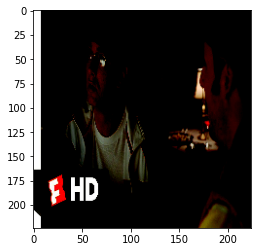

In [56]:
n = 3 
unscaled = testX[n]
plt.imshow(testX[n])

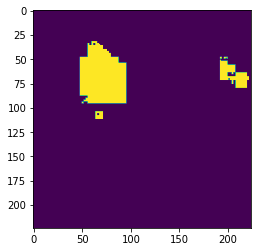

In [57]:
plt.imshow(pred_mask)

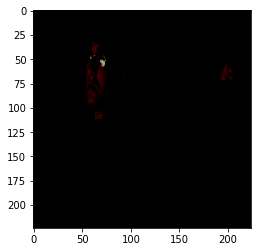

In [58]:
image2 = image
image2[:,:,0] = pred_mask*image[:,:,0]
image2[:,:,1] = pred_mask*image[:,:,1]
image2[:,:,2] = pred_mask*image[:,:,2]
out_image = image2
plt.imshow(out_image)

In [59]:
# Part B
# DOMAIN: Entertainment
# PROJECT OBJECTIVE: To create an image dataset to be used by AI team build an image classifier data. Profile images of people are given

In [60]:
# Q1. Read/import images from folder ‘training_images’.

In [61]:
# Solution
base_path = '/content/drive/My Drive/'
image_files = 'training_images-20211126T092819Z-001.zip'
extract_path = base_path+'Data/Extracted/' 
save_extracted = base_path+'Data/Save/'

In [62]:
from zipfile import ZipFile
images_zip_path = os.path.join(base_path, image_files)
with ZipFile(images_zip_path, 'r') as z:
  z.extractall()

In [63]:
zip_dir_loc = z.filelist[0].filename.split("/")[0] 
zip_dir_loc

'training_images'

In [64]:
# Random Image names 
raw_img_file_names = [os.path.join(zip_dir_loc,i) for i in os.listdir(zip_dir_loc)] 
raw_img_file_names[:5] 

['training_images/real_00310.jpg',
 'training_images/real_00967.jpg',
 'training_images/real_00907.jpg',
 'training_images/real_00506.jpg',
 'training_images/real_00684.jpg']

In [65]:
from tqdm.notebook import trange, tqdm
# Reading the images
from IPython.display import Image, display, Markdown, clear_output
img_list = []
for imgs in tqdm(raw_img_file_names):
  tst_img = cv2.imread(imgs)
  img_list.append(tst_img)
img_list = np.array(img_list)
display(Markdown(f"#### {img_list.shape}"))

  0%|          | 0/1091 [00:00<?, ?it/s]

#### (1091, 600, 600, 3)

In [66]:
# Observation:  
# The dataset comprises of 1091 images with a dimension of 600 X 600 and 3 channels (RGB).  

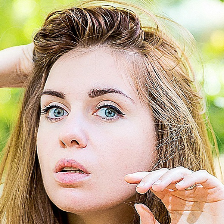

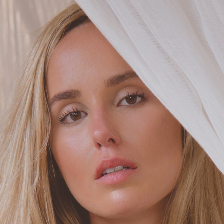

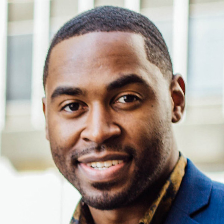

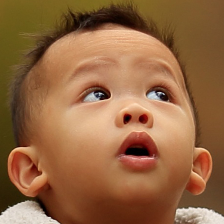

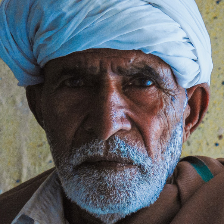

In [67]:
# Checking a few random images 
from google.colab.patches import cv2_imshow
for i in img_list[:5,]:
  cv2_imshow(cv2.resize(i,(224,224)))

In [68]:
# Q2. 
# Write a loop which will iterate through all the images in the ‘training_images’ folder and detect the faces present on all the images.

In [69]:
# Create bounding boxes
def test_bb(df,fname,title=""):

  tst_img = cv2.imread(fname)
  temp_df = df[df['Image_Name'] == fname]
  rect_img = []
  for rows in temp_df.index:
    x = df['x'][rows]
    y = df['y'][rows]
    w = df['w'][rows]
    h = df['h'][rows]
    cv2.rectangle(tst_img,(x,y),(x+w,y+h),(255,0,0),2)
    cv2.putText(tst_img, title, (int((x+w)*0.75),y-3),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255))
  cv2_imshow(tst_img)
  
  return

In [70]:
# Defining a function to read images and resize them
def show_face(img_list,scale=1.0):

  for imgs in img_list:
    img = cv2.imread(imgs)
    img_w  = int(img.shape[1]*scale)
    img_h = int(img.shape[0]*scale)
    img = cv2.resize(img,(img_w,img_h))
    display(Markdown(f"#### {imgs}"))
    cv2_imshow(img)
  return

In [71]:
# Download the HAAR Model
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2022-08-21 06:08:40--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.03s   

2022-08-21 06:08:40 (35.1 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



### Bounding Box parameters are `x`:23, `y`:138, `width`:394, `height`:394

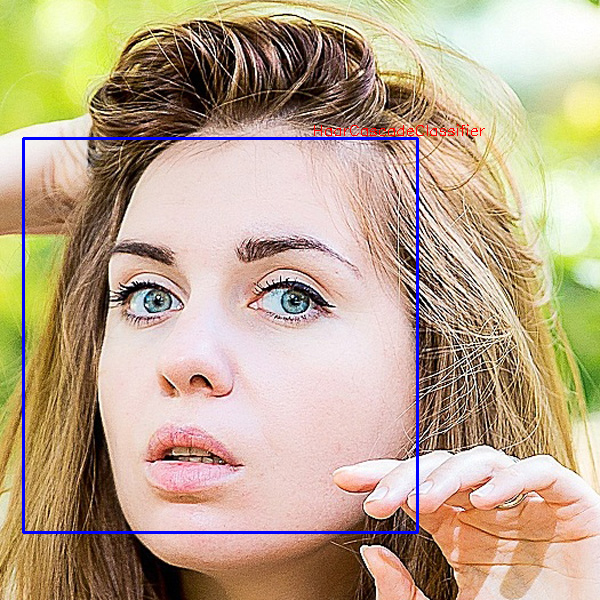

In [72]:
# Face detection using HAAR model
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
test_img = cv2.imread(raw_img_file_names[0])
grey = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(grey,1.1,4)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
  cv2.rectangle(test_img, (x, y), (x+w, y+h), (255, 0, 0), 2)
  cv2.putText(test_img, "HaarCascadeClassifier", (int((x+w)*0.75),y-3),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255))

# Display the output
display(Markdown(f"### Bounding Box parameters are `x`:{x}, `y`:{y}, `width`:{w}, `height`:{h}"))
cv2_imshow(test_img)

In [73]:
# Detecting faces for all the images
cascPath = "haarcascade_frontalface_default.xml"
# Create the haar cascade
faceCascade = cv2.CascadeClassifier(cascPath)
import glob
files=glob.glob("zip_dir_loc")
for file in files:
    # Read the image
    image = cv2.imread(file)
    print(file)
    grey = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
    # Detect faces in the image
    faces = faceCascade.detectMultiScale(grey, scaleFactor=1.1, minNeighbors=4,
        minSize=(30, 30), flags = cv2.CASCADE_SCALE_IMAGE)
    print ("Found {0} faces!".format(len(faces)))
    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        print (x, y, w, h)
        image  = image[y-top:y+h+bottom, x-left:x+w+right]
        print ("cropped_{1}{0}".format(str(file),str(x)))
        cv2.imwrite("cropped_{1}_{0}".format(str(file),str(x)), image)

In [74]:
haar_undetected_images = []
haar_detected_images = []
for fnames in tqdm(raw_img_file_names):
  if len(faces) == 0:
    haar_undetected_images.append(fnames)
  else:
    haar_detected_images.append(fnames)
  for (x,y,w,h) in faces:
      temp_dict = {'x':x, 
                  'y':y, 
                  'w':w,
                  'h':h, 
                  'Total_Faces':len(faces),
                  'Image_Name':fnames} 
display(Markdown(f"#### Detected faces for {len(haar_detected_images)} images"))
display(Markdown(f"#### Failed to detect faces for {len(haar_undetected_images)} images"))

  0%|          | 0/1091 [00:00<?, ?it/s]

#### Detected faces for 1091 images

#### Failed to detect faces for 0 images

In [75]:
# Q3
# From the same loop above, extract metadata of the faces and write into a DataFrame. [3 Marks]

In [76]:
# Solution
haar_img_box_df = pd.DataFrame(columns=['x','y','w','h','Total_Faces','Image_Name'])
haar_img_box_df

Empty DataFrame
Columns: [x, y, w, h, Total_Faces, Image_Name]
Index: []

In [77]:
len(raw_img_file_names)

1091

In [78]:
for fnames in tqdm(raw_img_file_names):
  grey = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
  faces = faceCascade.detectMultiScale(grey, scaleFactor=1.1, minNeighbors=4,
        minSize=(30, 30), flags = cv2.CASCADE_SCALE_IMAGE)
  if len(faces) == 0:
    haar_undetected_images.append(fnames)
    temp_dict = {'x':0, 
                 'y':0, 
                 'w':-1,
                 'h':-1, 
                 'Total_Faces':0,
                 'Image_Name':fnames} 
  else:
    haar_detected_images.append(fnames)
    for (x,y,w,h) in faces:
      temp_dict = {'x':x, 
                  'y':y, 
                  'w':w,
                  'h':h, 
                  'Total_Faces':len(faces),
                  'Image_Name':fnames} 
      haar_img_box_df = haar_img_box_df.append(temp_dict,ignore_index=True)

  0%|          | 0/1091 [00:00<?, ?it/s]

In [79]:
haar_img_box_df

x    y    w    h Total_Faces                      Image_Name
0     24  138  393  393           1  training_images/real_00310.jpg
1     24  138  393  393           1  training_images/real_00967.jpg
2     24  138  393  393           1  training_images/real_00907.jpg
3     24  138  393  393           1  training_images/real_00506.jpg
4     24  138  393  393           1  training_images/real_00684.jpg
...   ..  ...  ...  ...         ...                             ...
1086  24  138  393  393           1  training_images/real_00365.jpg
1087  24  138  393  393           1  training_images/real_00900.jpg
1088  24  138  393  393           1  training_images/real_00680.jpg
1089  24  138  393  393           1  training_images/real_00342.jpg
1090  24  138  393  393           1  training_images/real_01009.jpg

[1091 rows x 6 columns]

### Correctly detected the face

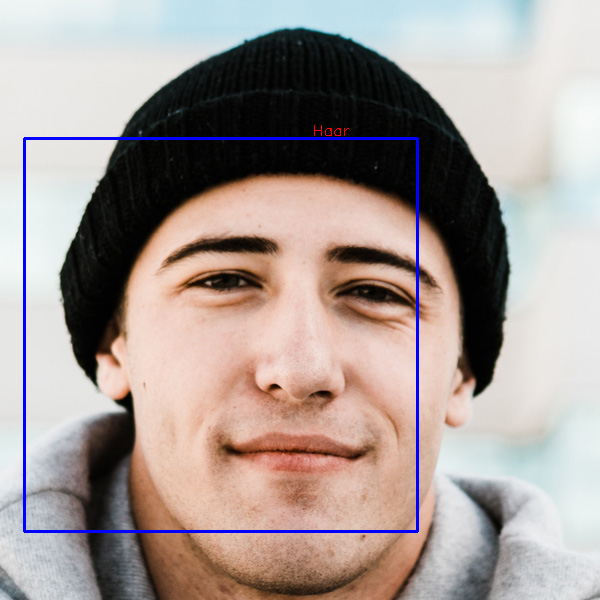

In [80]:
# A sample of a correctly detected image 
display(Markdown("### Correctly detected the face"))
test_bb(haar_img_box_df,"training_images/real_00115.jpg",title="Haar")

In [81]:
# Q4
# Save the output Dataframe in .csv format. 

In [82]:
# Solution
df = haar_img_box_df
# Saving the dataframe
df.to_csv(r'/content/drive/My Drive/haar_img_box.csv', index=False)

In [83]:
# Part C
# DOMAIN: Face Recognition
# PROJECT OBJECTIVE: Company X intends to build a face identification model to recognise human faces.

In [84]:
# Q1. 
# Unzip, read and Load data(‘PINS.zip’) into session.

In [85]:
# Solution 
base_path = '/content/drive/My Drive/'
image_files = 'PINS.zip'
extract_path = base_path+'Data/Extracted/' 
save_extracted = base_path+'Data/Save/'

In [86]:
from zipfile import ZipFile
images_zip_path = os.path.join(base_path, image_files)
with ZipFile(images_zip_path, 'r') as z:
  z.extractall()

In [87]:
zip_dir_loc = z.filelist[0].filename.split("/")[0] 
zip_dir_loc

'PINS'

In [88]:
# Random Image names 
raw_img_file_names = [os.path.join(zip_dir_loc,i) for i in os.listdir(zip_dir_loc)] 
raw_img_file_names[:5] 

['PINS/pins_brie larson',
 'PINS/pins_Bryan Cranston',
 'PINS/pins_Ursula Corbero',
 'PINS/pins_Dwayne Johnson',
 'PINS/pins_Gwyneth Paltrow']

In [89]:
from tqdm.notebook import trange, tqdm
# Reading the images
from IPython.display import Image, display, Markdown, clear_output
img_list = []
for imgs in tqdm(raw_img_file_names):
  tst_img = cv2.imread(imgs)
  img_list.append(tst_img)
img_list = np.array(img_list)
display(Markdown(f"#### {img_list.shape}"))

  0%|          | 0/100 [00:00<?, ?it/s]

#### (100,)

In [90]:
# There are 100 labels in the dataset 

In [91]:
paths = glob.glob("PINS/*")
label_names = [os.path.split(x)[1] for x in paths]

print("Total labels: {}".format(len(label_names)))
print("Labels: {}".format((label_names)))

Total labels: 100
Labels: ['pins_brie larson', 'pins_Bryan Cranston', 'pins_Ursula Corbero', 'pins_Dwayne Johnson', 'pins_Gwyneth Paltrow', 'pins_Stephen Amell', 'pins_Melissa benoit', 'pins_Henry Cavil', 'pins_Sebastian Stan', 'pins_William Fichtner', 'pins_Kit Harington', 'pins_Josh Radnor', 'pins_jeff bezos', 'pins_alexandra daddario', 'pins_Krysten Ritter', 'pins_Morgan Freeman', 'pins_david mazouz', 'pins_tati gabrielle', 'pins_millie bobby brown', 'pins_Rami Melek', 'pins_taylor swift', 'pins_Ryan Reynolds', 'pins_Chance Perdomo', 'pins_Brenton Thwaites', 'pins_chadwick boseman face', 'pins_Jason Momoa', 'pins_bellamy blake face', 'pins_Willa Holland', 'pins_Peter Dinklage', 'pins_Maisie Williams', 'pins_Betsy Brandt', 'pins_Amaury Nolasco', 'pins_jason isaacs', 'pins_Wentworth Miller', 'pins_elizabeth olsen face', 'pins_eliza taylor', 'pins_selena gomez', 'pins_Neil Patrick Harris', 'pins_Emily Bett Rickards', 'pins_robert downey jr face', 'pins_Dave Franco', 'pins_Morena Baccar

In [92]:
# Q2
# Write function to create metadata of the image.

In [93]:
# Solution 2
# Function to create metadata 
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file
    def __repr__(self):
      return self.image_path()
    def image_path(self):
      return os.path.join(self.base, self.name, self.file) 

In [94]:
# Q3. 
# Write a loop to iterate through each and every image and create metadata for all the images

In [95]:
# Solution 
# Function to load metadata 
path = zip_dir_loc
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)
metadata = load_metadata(path)
labels = np.array([meta.name for meta in metadata])

In [96]:
path = zip_dir_loc
metadata = load_metadata(path)

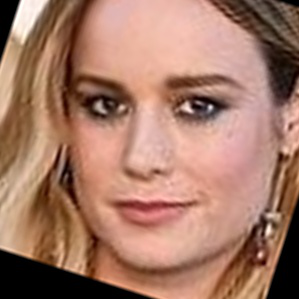

In [97]:
# Displaying a random image 
tf.keras.utils.load_img(metadata[0].image_path())

In [98]:
# Q4
# Generate Embeddings vectors on each face in the dataset

In [99]:
# Solution
# Loading the pre-trained weights 
weights_file =  '/content/drive/My Drive/Data/vgg_face_weights.h5'

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation
# VGG Face model
def vgg_face():
    seed = 7
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [101]:
model = vgg_face()
model.load_weights(weights_file)

In [102]:
# Remove last Softmax layer and get model upto last flatten layer with 2622 units of output 
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [103]:
vgg_face_descriptor.inputs, vgg_face_descriptor.outputs

([<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'zero_padding2d_input')>],
 [<KerasTensor: shape=(None, 2622) dtype=float32 (created by layer 'flatten')>])

In [104]:
# Get embedding vector for first image in the metadata using the pre-trained model
img_path = metadata[0].image_path()
img = tf.keras.utils.load_img(img_path)

In [105]:
# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (np.asarray(img) / 255).astype(np.float32)

In [106]:
img = cv2.resize(img, dsize = (224,224))
print(img.shape)

(224, 224, 3)


In [107]:
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(2622,)


In [108]:
total_images = len(metadata)
total_images

10770

In [109]:
# Function to generate Embeddings vectors on each face in the dataset.
embeddings = np.zeros((metadata.shape[0], 2622))
for i, m in enumerate(metadata):
    img_path = metadata[i].image_path()
    img = tf.keras.utils.load_img(img_path)
    img = (np.asarray(img) / 255).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    embeddings[i] = embedding_vector 

In [110]:
# Q5
# Build distance metrics for identifying the distance between two similar and dissimilar images.

In [111]:
# Define functions to measure the distance between two different images to evaluate how identical they are
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))
  

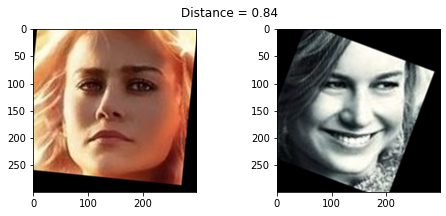

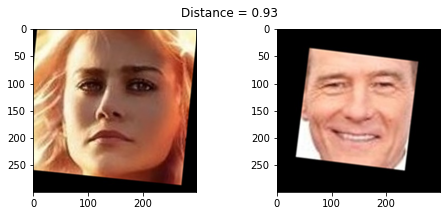

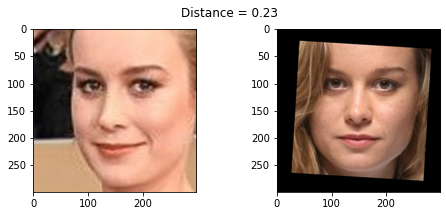

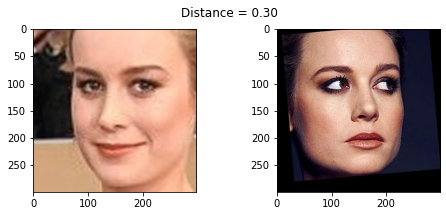

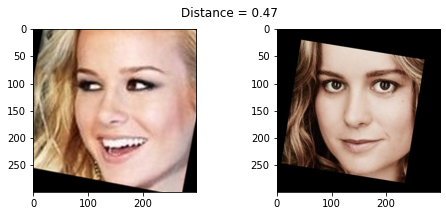

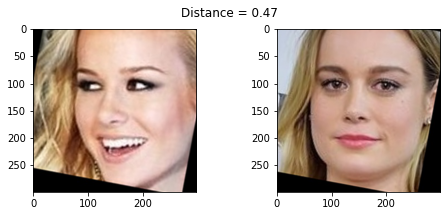

In [112]:
import matplotlib.pyplot as plt
def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(tf.keras.utils.load_img(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(tf.keras.utils.load_img(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)
show_pair(30, 31)
show_pair(30, 100)
show_pair(70, 72) 
show_pair(70, 115)

In [113]:
# Q6
# Use PCA for dimensionality reduction 

In [114]:
# Solution
# Train and Test images
# Every 9th image goes in test data and rest go in train data
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0  

In [115]:
# One half as train examples of 10 identities
X_train = embeddings[train_idx]
# One-half as test examples of 10 identities
X_test = embeddings[test_idx]

targets = np.array([m.name for m in metadata])
y_train = targets[train_idx]
y_test = targets[test_idx]

In [116]:
targets 

array(['pins_brie larson', 'pins_brie larson', 'pins_brie larson', ...,
       'pins_RJ Mitte', 'pins_RJ Mitte', 'pins_RJ Mitte'], dtype='<U29')

In [117]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape  

((9573, 2622), (1197, 2622), (9573,), (1197,))

In [118]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# Numerical encoding of identities
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [119]:
# Standarize features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [120]:
# Reduce feature dimensions using Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=128, svd_solver='randomized', whiten=True, random_state =7)
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test)

In [121]:
print(pca.components_.shape)

(128, 2622)


In [122]:
# Q7
# Build an SVM classifier in order to map each image to its right person.

In [123]:
# Solution
from sklearn.svm import SVC
svc = SVC(random_state = 7, class_weight='balanced', probability=True)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9732664995822891

In [124]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': 7,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [125]:
# Hyper-parameter tuning 
from hyperopt import hp
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe 
from sklearn.model_selection import cross_val_score 
# Distributed Asynchronous Hyper-parameter Optimization using HyperOpt. It is based on Bayesian Optimization and supported by the 
# SMBO (Sequential Model-Based Global Optimization)
# define objective function 
def hyperparameter_tuning(params):
    svc = SVC(**params)
    acc = cross_val_score(svc, X_train, y_train, scoring="accuracy").mean()
    return {"loss": -acc, "status": STATUS_OK}
# HyperOpt minimizes the function, that's why, acc is preceded by a negative sign
Search_space = {'C': hp.uniform('C', 0.1, 10),
              'gamma': hp.uniform('gamma', 0.001, 1),
}    
trials = Trials()

# fmin function : Optimization function  
# tpe : Tree Parzen Estimators

best = fmin(
    fn=hyperparameter_tuning,
    space = Search_space, 
    algo=tpe.suggest, 
    max_evals=100,  
    trials=trials
)

print("Best: {}".format(best))

100%|██████████| 100/100 [1:44:35<00:00, 62.76s/it, best loss: -0.962812149586256]
Best: {'C': 2.4568584537538607, 'gamma': 0.004949195566934746}


In [127]:
# Using the best hyper-parameters for evaluating the performance of train and test data
svc_tuned = SVC(C = 2.4568584537538607, break_ties = False, cache_size = 200, class_weight = 'balanced', coef0 = 0.0, degree = 3,
                gamma = 0.004949195566934746, kernel = 'rbf', max_iter = -1, probability = True, decision_function_shape = 'ovr', random_state = 7, shrinking = True, tol = 0.001, verbose = False) 

In [128]:
# Evaluating the tuned model performance 
svc_tuned.fit(X_train, y_train)
svc_tuned.score(X_test, y_test)

0.9665831244778613

In [129]:
y_predict = svc_tuned.predict(X_test)

In [130]:
names = [name.split('_')[1].title().strip() for name in labels]
# Classification Report
print('Classification Report: \n{}'.format(classification_report(y_test, y_predict, target_names = np.unique(names))))

Classification Report: 
                          precision    recall  f1-score   support

              Aaron Paul       1.00      1.00      1.00         9
      Alexandra Daddario       1.00      1.00      1.00        10
            Alvaro Morte       0.92      0.85      0.88        13
Alycia Debnam Carey Face       1.00      1.00      1.00        12
             Amanda Crew       1.00      1.00      1.00         7
          Amaury Nolasco       0.89      0.89      0.89         9
        Amber Heard Face       1.00      0.88      0.93         8
               Anna Gunn       1.00      0.93      0.96        14
           Anne Hathaway       0.93      1.00      0.96        13
     Barbara Palvin Face       1.00      1.00      1.00         9
      Bellamy Blake Face       1.00      1.00      1.00        14
    Benedict Cumberbatch       1.00      1.00      1.00        12
            Betsy Brandt       1.00      1.00      1.00        10
              Bill Gates       1.00      0.80      

In [131]:
# Test result

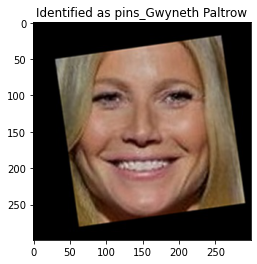

In [132]:
random_idx = 57
random_image = tensorflow.keras.utils.load_img(metadata[test_idx][random_idx].image_path())
prediction = svc_tuned.predict([X_test[random_idx]])
identity = encoder.inverse_transform(prediction)[0]

plt.imshow(random_image)
plt.title(f'Identified as {identity}');

In [133]:
# Q8
# Import and display the the test images.
# Benedict Cumberbatch9.jpg’ and ‘Dwayne Johnson4.jpg’ are the test images.

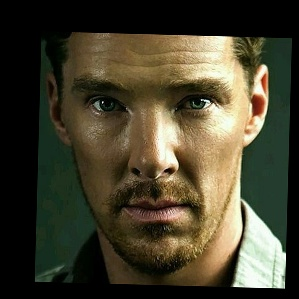

In [134]:
# Solution
# Displaying Benedict Cumberbatch
import cv2
img_path_1 = "/content/drive/My Drive/Data/Benedict Cumberbatch9.jpg"
from google.colab.patches import cv2_imshow
img_1 = cv2.imread(img_path_1)
cv2_imshow(img_1)

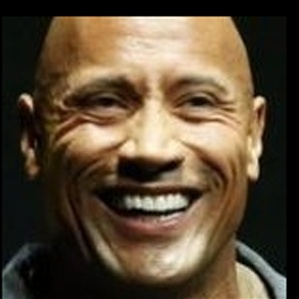

In [135]:
# Displaying Dwayne Johnson
import cv2
img_path_2 =  "/content/drive/My Drive/Data/Dwayne Johnson4.jpg"
from google.colab.patches import cv2_imshow
img_2 = cv2.imread(img_path_2)
cv2_imshow(img_2)

In [136]:
# Q9.
# Use the trained SVM model to predict the face on both test images.

In [137]:
# Solution
y_predict = svc_tuned.predict(X_test)
y_predict_decoded = encoder.inverse_transform(y_predict)

In [138]:
# Benedict Cumberbatch 
img_1.shape

(299, 299, 3)

In [139]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
img_1_path = "/content/drive/My Drive/Data/Benedict Cumberbatch9.jpg"
img_1 = cv2.imread(img_1_path)
# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img_1_norm = (np.asarray(img_1) /255).astype(np.float32)

In [140]:
img_1_norm_res = cv2.resize(img_1_norm, (IMAGE_WIDTH, IMAGE_HEIGHT))
img_1_norm_res_ex = np.expand_dims(img_1_norm_res, axis=0)
img_1_norm_res_sq = np.squeeze(img_1_norm_res_ex, axis=0) 

In [141]:
img_1_norm_res_sq.shape  

(224, 224, 3)

In [142]:
embedding_vector_1 = vgg_face_descriptor.predict(np.expand_dims(img_1_norm_res_sq, axis=0))
print(embedding_vector_1.shape)

(1, 2622)


In [143]:
embedding_vector_1 

array([[ 0.01071783, -0.00820076,  0.00618027, ..., -0.00858733,
        -0.00020872,  0.01101288]], dtype=float32)

In [144]:
# PCA 
embedding_vector_1_pca = pca.transform(embedding_vector_1)

In [145]:
embedding_vector_1_pca 

array([[-9.79492536e-03,  2.69733217e-02,  1.07033096e-02,
         1.53864344e-02, -3.79224547e-03,  7.88232364e-03,
        -6.13509833e-03, -7.52134780e-03, -6.17569197e-03,
         6.64038420e-03,  3.82504994e-03,  1.29474725e-02,
         1.02054133e-03,  3.10908006e-03,  6.30634440e-03,
         5.45607795e-04, -6.14779367e-03, -1.74382375e-02,
        -4.34841936e-03,  1.33919980e-02, -2.24699554e-03,
        -1.06850885e-02,  3.02299975e-03,  1.34242896e-03,
         5.90502986e-03, -1.31681536e-02, -4.56401791e-03,
        -1.77895499e-02,  6.15619579e-03,  5.87282506e-03,
        -4.06041407e-03,  8.03726372e-03,  4.88506105e-03,
        -4.97756869e-03,  2.45361576e-02,  2.93679239e-03,
         1.09497570e-02,  1.82117007e-02, -2.14250197e-02,
        -2.76215013e-03, -1.99315466e-04, -9.54131791e-03,
         1.49692458e-02, -9.85611193e-03, -4.61120908e-03,
        -7.95761319e-03, -2.18710958e-03, -1.31047889e-02,
        -3.11570739e-03,  4.56767910e-03, -1.49119344e-0

In [146]:
y_predict_1 = svc_tuned.predict(embedding_vector_1_pca)
identity_1 = encoder.inverse_transform(y_predict_1)[0]

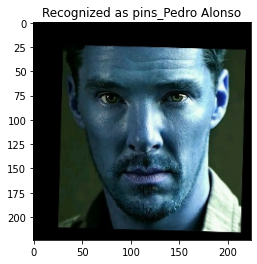

In [147]:
plt.imshow(img_1_norm_res)
plt.title(f'Recognized as {identity_1}');

In [148]:
# Dwayne Johnson
img_2.shape

(299, 299, 3)

In [149]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
img_2_path = "/content/drive/My Drive/Data/Dwayne Johnson4.jpg"
img_2 = cv2.imread(img_2_path)
# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img_2_norm = (np.asarray(img_2) /255).astype(np.float32)

In [150]:
img_2_norm_res = cv2.resize(img_2_norm, (IMAGE_WIDTH, IMAGE_HEIGHT))
img_2_norm_res_ex = np.expand_dims(img_2_norm_res, axis=0)
img_2_norm_res_sq = np.squeeze(img_2_norm_res_ex, axis=0) 

In [151]:
img_2_norm_res_sq.shape  

(224, 224, 3)

In [152]:
embedding_vector_2 = vgg_face_descriptor.predict(np.expand_dims(img_2_norm_res_sq, axis=0))
print(embedding_vector_2.shape)

(1, 2622)


In [153]:
embedding_vector_2 

array([[ 0.01432546,  0.0075403 ,  0.01586977, ..., -0.0092186 ,
         0.01742793,  0.00472015]], dtype=float32)

In [154]:
# PCA 
embedding_vector_2_pca = pca.transform(embedding_vector_2)

In [155]:
embedding_vector_2_pca

array([[-1.33883421e-02,  1.58465292e-02,  2.25357371e-02,
         2.19996426e-02,  2.14453936e-02, -4.55827547e-03,
        -1.70770028e-02, -3.80278336e-03, -4.30976841e-04,
         7.99769796e-03,  2.05764714e-02,  3.25056834e-03,
        -2.03818689e-02,  1.11365151e-02, -6.81110637e-03,
        -2.44412612e-02, -7.28297068e-03, -1.79450491e-02,
        -1.51761362e-02,  7.58003474e-04,  1.16982981e-02,
         1.22793265e-03, -8.44575601e-03, -7.09383151e-03,
        -2.21974572e-03, -1.59842893e-02,  5.16245413e-04,
         1.19238586e-02, -3.72308825e-03,  1.69026664e-03,
        -9.72016301e-03,  1.10272637e-02,  1.04123482e-03,
        -1.17939079e-02,  5.68141861e-05,  3.82197430e-03,
         1.03002958e-02,  1.51349692e-02, -3.92630883e-03,
         6.79174084e-04,  4.69051612e-03,  4.06493015e-03,
        -7.17926139e-03, -6.66817349e-03,  9.16977557e-03,
        -1.37724855e-02,  3.43114762e-04,  5.09290158e-04,
        -2.60270729e-02,  9.34043568e-03,  2.74657791e-0

In [156]:
y_predict_2 = svc_tuned.predict(embedding_vector_2_pca)
identity_2 = encoder.inverse_transform(y_predict_2)[0]

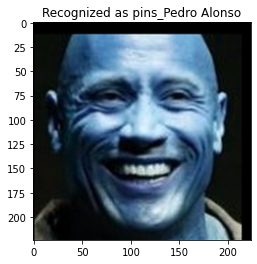

In [157]:
plt.imshow(img_2_norm_res)
plt.title(f'Recognized as {identity_2}');

In [158]:
# Both the images were incorrectly labelled by SVM 